In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pytensor.tensor as pt
import seaborn as sns

prepro datos futbol

In [2]:
df_all = pd.read_csv("results_liga_argentina.csv", index_col=0)

In [3]:
df_all

,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,Nacional 1976 - Grupo C,1,All Boys,2,0,Aldosivi,0
1,Nacional 1976 - Grupo C,0,Aldosivi,4,0,All Boys,1
2,Superliga 2019/20 - Fecha 2,0,Aldosivi,0,0,Argentinos,7
3,Superliga 2018/19 - Fecha 15,7,Argentinos,1,2,Aldosivi,0
4,Torneo 2016 - Fecha 2,0,Aldosivi,3,2,Argentinos,7
...,...,...,...,...,...,...,...
32849,Nacional 1976 - Grupo C,93,Union,1,0,Velez,94
32850,Metropolitano 1975 - Fecha 36,94,Velez,0,0,Union,93
32851,Metropolitano 1975 - Fecha 17,93,Union,1,0,Velez,94
32852,Metropolitano 1970 - Fecha 16,93,Union,1,1,Velez,94


In [4]:
df_all.date_name

0              Nacional 1976 - Grupo C
1              Nacional 1976 - Grupo C
2          Superliga 2019/20 - Fecha 2
3         Superliga 2018/19 - Fecha 15
4                Torneo 2016 - Fecha 2
                     ...              
32849          Nacional 1976 - Grupo C
32850    Metropolitano 1975 - Fecha 36
32851    Metropolitano 1975 - Fecha 17
32852    Metropolitano 1970 - Fecha 16
32853          Nacional 1969 - Fecha 7
Name: date_name, Length: 32854, dtype: object

defino un dataframe con los años de interes

In [5]:
df_new = pd.DataFrame(columns=df_all.columns)

anios_interes = np.arange(2010, 2021, 1)
for anio in anios_interes:
    print(str(anio) + ': '+ str(df_all.date_name.str.contains(str(anio)).sum()))
    df_new = pd.concat([df_new, df_all[df_all.date_name.str.contains(str(anio))]], ignore_index=True)

2010: 384
2011: 385
2012: 384
2013: 381
2014: 380
2015: 468
2016: 692
2017: 378
2018: 325
2019: 276
2020: 0


In [6]:
df_new

,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
0,Torneo Apertura 2010 - Fecha 12,7,Argentinos,1,0,All Boys,1
1,Torneo Apertura 2010 - Fecha 14,8,Arsenal,0,0,All Boys,1
2,Torneo Apertura 2010 - Fecha 17,1,All Boys,2,1,Banfield,14
3,Torneo Apertura 2010 - Fecha 3,1,All Boys,2,0,Boca Juniors,17
4,Torneo Apertura 2010 - Fecha 6,25,Colon,1,1,All Boys,1
...,...,...,...,...,...,...,...
4048,Superliga 2019/20 - Fecha 5,77,San Lorenzo,2,1,Union,93
4049,Superliga 2019/20 - Fecha 19,77,San Lorenzo,1,0,Velez,94
4050,Superliga 2019/20 - Fecha 16,88,Talleres (C),0,0,Union,93
4051,Superliga 2019/20 - Fecha 1,88,Talleres (C),1,0,Velez,94


In [7]:
len(df_new)

4053

In [8]:
df_new.columns

Index(['date_name', 'local_team_id', 'local_team', 'local_result',
       'visitor_result', 'visitor_team', 'visitor_team_id'],
      dtype='object')

que equipos quedaron?

In [9]:
df_new.local_team.unique()

array(['Argentinos', 'Arsenal', 'All Boys', 'Colon', 'Gimnasia (LP)',
       'Huracan', 'Lanus', 'Quilmes', 'Racing Club', 'Rosario Central',
       'San Lorenzo', 'Atl Tucuman', 'Banfield', 'Boca Juniors',
       'Estudiantes (LP)', 'Independiente', 'Olimpo', 'River Plate',
       'Tigre', 'Velez', 'Atl Rafaela', 'Chacarita', 'Godoy Cruz',
       'Newells', 'San Martin (SJ)', 'Union', 'Belgrano', 'Instituto',
       'Def y Justicia', 'Aldosivi', 'Crucero (M)', 'Nueva Chicago',
       'Sarmiento (J)', 'Temperley', 'Patronato', 'Talleres (C)',
       'San Martin (T)', 'Central Cba (SdE)'], dtype=object)

In [10]:
df_all = df_new

In [11]:
df_all.describe()

,date_name,local_team_id,local_team,local_result,visitor_result,visitor_team,visitor_team_id
count,4053,4053,4053,4053,4053,4053,4053
unique,350,38,38,7,7,38,38
top,Campeonato 2016/17 - Fecha 2,37,Estudiantes (LP),1,0,Lanus,63
freq,15,173,173,1429,1567,173,173


In [12]:
df_all.columns

Index(['date_name', 'local_team_id', 'local_team', 'local_result',
       'visitor_result', 'visitor_team', 'visitor_team_id'],
      dtype='object')

renombro para mantener la cordura

In [13]:
# df_all = df_all.rename({'local_result': 'home_score', 'visitor_result': 'away_score'}).copy(True)

df_all.rename(columns = {'local_result': 'home_score', 'visitor_result': 'away_score'}, inplace=True)

In [14]:
df_all.rename(columns = {'local_team': 'home_team', 'visitor_team': 'away_team'}, inplace=True)

In [15]:
df_all.columns

Index(['date_name', 'local_team_id', 'home_team', 'home_score', 'away_score',
       'away_team', 'visitor_team_id'],
      dtype='object')

calculo diferencia de goles

In [16]:
df_all["difference"] = np.abs(df_all["home_score"] - df_all["away_score"])
df_all["difference_non_abs"] = df_all["home_score"] - df_all["away_score"]

In [17]:
#(
#    df_all.pivot_table("difference_non_abs", "home_team")
#    .rename_axis("Home_Team")
#    .plot(kind="bar", rot=45, legend=False)
#    .set_ylabel("Score difference Home team and away team")
#);

In [18]:
import plotly.express as px

# Create the pivoted DataFrame
df_pivot = df_all.pivot_table("difference_non_abs", "home_team").reset_index()
df_pivot.columns = ["Home_Team", "Score_Difference"]

# Plot using Plotly
fig = px.bar(
    df_pivot,
    x="Home_Team",
    y="Score_Difference",
    labels={"Score_Difference": "Score difference Home team and away team"},
    title="Score Difference by Home Team"
)

# Customize rotation of x-axis labels
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [19]:
#
#    df_all.pivot_table("difference_non_abs", "away_team")
#    .rename_axis("Away_Team")
#    .plot(kind="bar", rot=0, legend=False)
#    .set_ylabel("Score difference Home team and away team")
#);

# Create the pivoted DataFrame
df_pivot = df_all.pivot_table("difference_non_abs", "away_team").reset_index()
df_pivot.columns = ["away_team", "Score_Difference"]

# Plot using Plotly
fig = px.bar(
    df_pivot,
    x="away_team",
    y="Score_Difference",
    labels={"Score_Difference": "Score difference Home team and away team"},
    title="Score Difference by Home Team"
)

# Customize rotation of x-axis labels
fig.update_layout(xaxis_tickangle=-45)

fig.show()

trato de extraer la fecha (no salio facil)

In [22]:
''' 
df_all['date_name']
df_all['date_name'].iloc[0].split(' ')[2]
df_all['year'] = df_all['date_name'].apply(lambda x: int(x.split(' ')[2]))
'''

" \ndf_all['date_name']\ndf_all['date_name'].iloc[0].split(' ')[2]\ndf_all['year'] = df_all['date_name'].apply(lambda x: int(x.split(' ')[2]))\n"

In [ ]:
#g = sns.FacetGrid(df_all, col="home_team", col_wrap=2, height=5)
#g.map(sns.scatterplot, "year", "difference_non_abs")
#g.fig.autofmt_xdate()

datos completos

histograma goles

(array([0.27732544, 0.35257834, 0.22329139, 0.10831483, 0.03084135,
        0.00616827, 0.00148038, 0.        ]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

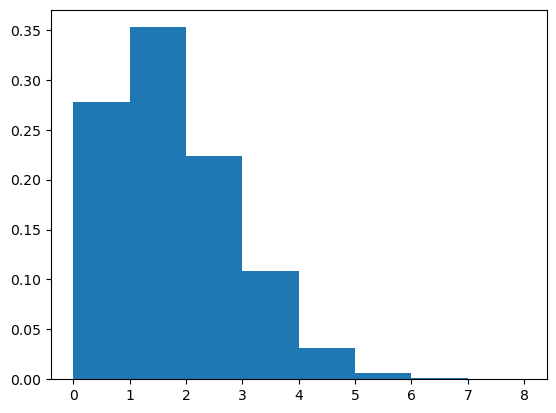

In [21]:
plt.hist(df_all["home_score"].values, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], density=True)

(array([0.38662719, 0.35529238, 0.17049099, 0.0656304 , 0.01776462,
        0.00296077, 0.00123365, 0.        ]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

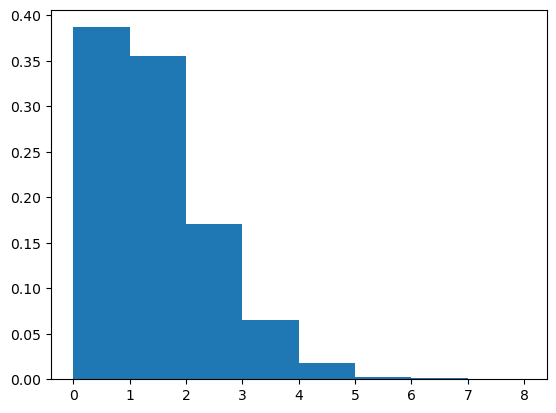

In [23]:
plt.hist(df_all["away_score"].values, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8], density=True)

In [24]:
home_idx, teams = pd.factorize(df_all["home_team"], sort=True)
away_idx, _ = pd.factorize(df_all["away_team"], sort=True)
coords = {"team": teams}

In [133]:
home_idx

array([ 2,  3,  1, ..., 33, 33, 36], shape=(4053,))

In [25]:
teams

Index(['Aldosivi', 'All Boys', 'Argentinos', 'Arsenal', 'Atl Rafaela',
       'Atl Tucuman', 'Banfield', 'Belgrano', 'Boca Juniors',
       'Central Cba (SdE)', 'Chacarita', 'Colon', 'Crucero (M)',
       'Def y Justicia', 'Estudiantes (LP)', 'Gimnasia (LP)', 'Godoy Cruz',
       'Huracan', 'Independiente', 'Instituto', 'Lanus', 'Newells',
       'Nueva Chicago', 'Olimpo', 'Patronato', 'Quilmes', 'Racing Club',
       'River Plate', 'Rosario Central', 'San Lorenzo', 'San Martin (SJ)',
       'San Martin (T)', 'Sarmiento (J)', 'Talleres (C)', 'Temperley', 'Tigre',
       'Union', 'Velez'],
      dtype='object')

In [26]:
with pm.Model(coords=coords) as model:
    # constant data
    home_team = pm.Data("home_team", home_idx, dims="match")
    away_team = pm.Data("away_team", away_idx, dims="match")

    # global model parameters
    home = pm.Normal("home", mu=0, sigma=1)
    sd_att = pm.HalfNormal("sd_att", sigma=2)
    sd_def = pm.HalfNormal("sd_def", sigma=2)
    # intercept = pm.Normal("intercept", mu=3, sigma=1)

    # team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=0, sigma=sd_att, dims="team")
    defs_star = pm.Normal("defs_star", mu=0, sigma=sd_def, dims="team")

    atts = pm.Deterministic("atts", atts_star - pt.mean(atts_star), dims="team")
    defs = pm.Deterministic("defs", defs_star - pt.mean(defs_star), dims="team")
    home_theta = pt.exp(home + atts[home_idx] + defs[away_idx]) #intercept + 
    away_theta = pt.exp(atts[away_idx] + defs[home_idx])

    # likelihood of observed data
    home_points = pm.Poisson(
        "home_points",
        mu=home_theta,
        observed=df_all["home_score"].values.astype(int),
        dims=("match"),
    )
    away_points = pm.Poisson(
        "away_points",
        mu=away_theta,
        observed=df_all["away_score"].values.astype(int),
        dims=("match"),
    )

In [ ]:
# debug
''' 
with model:
    a = away_theta.eval()

print(a.max())
'''

In [ ]:
#for i in df_all["home_score"].values:
#    print(i, type(i))

In [27]:
with model:    
    trace = pm.sample(3000, tune=1500, cores=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [home, sd_att, sd_def, atts_star, defs_star]


Output()

Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 42 seconds.


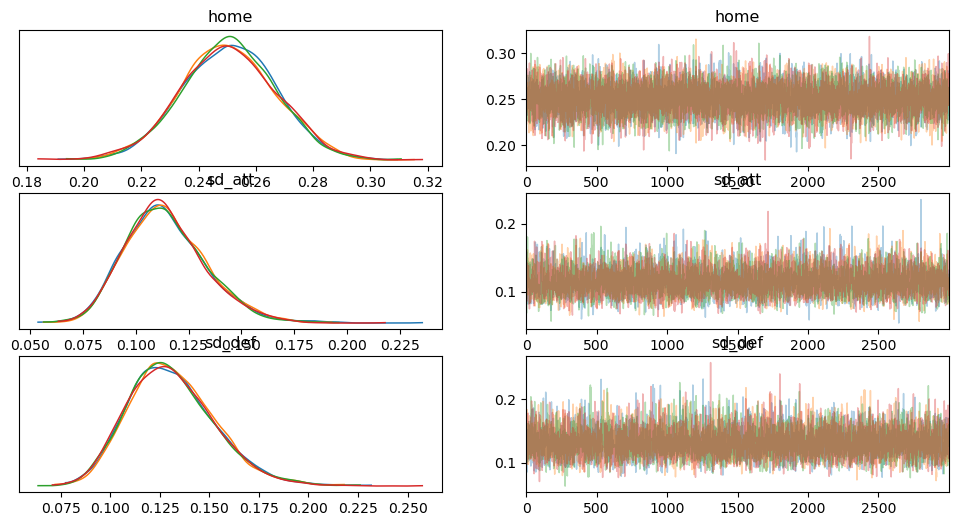

In [28]:
az.plot_trace(trace, var_names=["home", "sd_att", "sd_def"], compact=False); #"intercept", 

In [29]:
az.summary(trace, kind="diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
home,0.000,0.000,10927.0,9293.0,1.0
atts_star[Aldosivi],0.001,0.001,14852.0,8028.0,1.0
atts_star[All Boys],0.001,0.001,11305.0,8562.0,1.0
atts_star[Argentinos],0.001,0.001,11366.0,8157.0,1.0
atts_star[Arsenal],0.000,0.000,11462.0,8631.0,1.0
...,...,...,...,...,...
defs[Talleres (C)],0.001,0.001,16650.0,8072.0,1.0
defs[Temperley],0.001,0.001,15843.0,8561.0,1.0
defs[Tigre],0.000,0.001,18902.0,7627.0,1.0
defs[Union],0.000,0.001,18085.0,9323.0,1.0


In [30]:
trace_hdi = az.hdi(trace)
trace_hdi["atts"]

<xarray.DataArray 'atts' (team: 38, hdi: 2)> Size: 608B
array([[-0.24865207,  0.01618727],
       [-0.21719022,  0.02516393],
       [-0.20859247, -0.01245724],
       [-0.06335175,  0.11560123],
       [-0.08772836,  0.12069058],
       [-0.09354159,  0.15055926],
       [-0.10132586,  0.08890081],
       [-0.16374316,  0.02695428],
       [ 0.14262546,  0.30730862],
       [-0.21226745,  0.15692782],
       [-0.19531216,  0.13356439],
       [-0.16542645,  0.01608927],
       [-0.28940147,  0.07305675],
       [-0.06650289,  0.1584945 ],
       [-0.04269353,  0.12846916],
       [-0.14223629,  0.04962224],
       [ 0.0073417 ,  0.17689351],
       [-0.18450185,  0.03204198],
       [-0.00988702,  0.16804107],
       [-0.19572834,  0.22255781],
       [ 0.00700927,  0.17797515],
       [-0.0428714 ,  0.13046226],
       [-0.21026992,  0.14169556],
       [-0.23302877, -0.02187753],
       [-0.16358696,  0.09531525],
       [-0.19263355,  0.02751597],
       [ 0.0762325 ,  0.24359153],
       [ 0.09397108,  0.27436712],
       [-0.08532349,  0.11574205],
       [-0.03253883,  0.14123948],
       [-0.11095114,  0.10034937],
       [-0.19394466,  0.1621479 ],
       [-0.27658979,  0.02546933],
       [-0.07634787,  0.18616632],
       [-0.30191685, -0.01319225],
       [-0.01748865,  0.15671737],
       [-0.14006441,  0.06457072],
       [ 0.04080621,  0.21311524]])
Coordinates:
  * team     (team) <U17 3kB 'Aldosivi' 'All Boys' ... 'Union' 'Velez'
  * hdi      (hdi) <U6 48B 'lower' 'higher'

segun entiendo, esta es la mediano del valor de ataque por equipo

In [31]:
trace.posterior["atts"].median(("chain", "draw"))

<xarray.DataArray 'atts' (team: 38)> Size: 304B
array([-0.11078164, -0.09395681, -0.11096062,  0.02474903,  0.01787722,
        0.02743543, -0.00522798, -0.06725774,  0.22481516, -0.02480894,
       -0.03119164, -0.07489236, -0.10429315,  0.04481422,  0.04156057,
       -0.04694444,  0.09476186, -0.07132072,  0.07921777,  0.00637871,
        0.09471191,  0.03987945, -0.03195078, -0.12399504, -0.03354785,
       -0.08073518,  0.15989003,  0.18645038,  0.01380013,  0.05432301,
       -0.00506725, -0.00840475, -0.12249381,  0.05537452, -0.15828965,
        0.06800429, -0.03974665,  0.12637365])
Coordinates:
  * team     (team) <U17 3kB 'Aldosivi' 'All Boys' ... 'Union' 'Velez'

In [32]:
'''
_, ax = plt.subplots(figsize=(12, 6))

ax.scatter(teams, trace.posterior["atts"].median(dim=("chain", "draw")), color="C0", alpha=1, s=100)
ax.vlines(
    teams,
    trace_hdi["atts"].sel({"hdi": "lower"}),
    trace_hdi["atts"].sel({"hdi": "higher"}),
    alpha=0.6,
    lw=5,
    color="C0",
)
ax.set_xlabel("Teams")
ax.set_ylabel("Posterior Attack Strength")
ax.set_title("HDI of Team-wise Attack Strength");
ax.tick_params(axis='x', labelrotation=90)
''' 
import plotly.graph_objects as go

# Prepare data
df_plot = pd.DataFrame({
    "Team": teams,
    "Median": trace.posterior["atts"].median(dim=("chain", "draw")).values,
    "Lower": trace_hdi["atts"].sel(hdi="lower").values,
    "Upper": trace_hdi["atts"].sel(hdi="higher").values
})

# Create figure
fig = go.Figure()

# Add HDI error bars as line segments
fig.add_trace(go.Scatter(
    x=df_plot["Team"],
    y=df_plot["Median"],
    mode='markers',
    marker=dict(size=10, color='blue'),
    error_y=dict(
        type='data',
        symmetric=False,
        array=df_plot["Upper"] - df_plot["Median"],
        arrayminus=df_plot["Median"] - df_plot["Lower"],
        thickness=6,
        color='blue',
    ),
    name="Attack Strength"
))

# Update layout
fig.update_layout(
    title="HDI of Team-wise Attack Strength",
    xaxis_title="Teams",
    yaxis_title="Posterior Attack Strength",
    xaxis_tickangle=-90,
    width=1000,
    height=500
)

fig.show()


In [ ]:
trace.pos

In [33]:
import plotly.graph_objects as go

# Prepare data
df_plot = pd.DataFrame({
    "Team": teams,
    "Median": trace.posterior["defs"].median(dim=("chain", "draw")).values,
    "Lower": trace_hdi["defs"].sel(hdi="lower").values,
    "Upper": trace_hdi["defs"].sel(hdi="higher").values
})

# Create figure
fig = go.Figure()

# Add HDI error bars as line segments
fig.add_trace(go.Scatter(
    x=df_plot["Team"],
    y=df_plot["Median"],
    mode='markers',
    marker=dict(size=10, color='red'),
    error_y=dict(
        type='data',
        symmetric=False,
        array=df_plot["Upper"] - df_plot["Median"],
        arrayminus=df_plot["Median"] - df_plot["Lower"],
        thickness=6,
        color='red',
    ),
    name="Defense Strength"
))

# Update layout
fig.update_layout(
    title="HDI of Team-wise Defense Strength",
    xaxis_title="Teams",
    yaxis_title="Posterior Defense Strength",
    xaxis_tickangle=-90,
    width=1000,
    height=500
)

fig.show()


scatter ataque vs defensa

In [34]:

df_plot_a = pd.DataFrame({
    "Team": teams,
    "Median": trace.posterior["atts"].median(dim=("chain", "draw")).values,
    "Lower": trace_hdi["atts"].sel(hdi="lower").values,
    "Upper": trace_hdi["atts"].sel(hdi="higher").values
})

df_plot_d = pd.DataFrame({
    "Team": teams,
    "Median": trace.posterior["defs"].median(dim=("chain", "draw")).values,
    "Lower": trace_hdi["defs"].sel(hdi="lower").values,
    "Upper": trace_hdi["defs"].sel(hdi="higher").values
})

'''
# Sample data
x = df_plot_d.Median
y = df_plot_a.Median

# Asymmetrical error values for x-axis
xerr_neg = df_plot_d.Median-df_plot_d.Lower
xerr_pos = df_plot_d.Upper-df_plot_d.Median
xerr = np.array([xerr_neg, xerr_pos])

# Asymmetrical error values for y-axis
yerr_neg = df_plot_a.Median-df_plot_a.Lower
yerr_pos = df_plot_a.Upper-df_plot_a.Median
yerr = np.array([yerr_neg, yerr_pos])

# Create the errorbar plot
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', capsize=5, label=df_plot_a.Team, color='blue')

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title("Asymmetrical Error Bars")
'''

'\n# Sample data\nx = df_plot_d.Median\ny = df_plot_a.Median\n\n# Asymmetrical error values for x-axis\nxerr_neg = df_plot_d.Median-df_plot_d.Lower\nxerr_pos = df_plot_d.Upper-df_plot_d.Median\nxerr = np.array([xerr_neg, xerr_pos])\n\n# Asymmetrical error values for y-axis\nyerr_neg = df_plot_a.Median-df_plot_a.Lower\nyerr_pos = df_plot_a.Upper-df_plot_a.Median\nyerr = np.array([yerr_neg, yerr_pos])\n\n# Create the errorbar plot\nplt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt=\'o\', capsize=5, label=df_plot_a.Team, color=\'blue\')\n\n# Add labels and title\nplt.xlabel("X-axis")\nplt.ylabel("Y-axis")\nplt.legend()\nplt.title("Asymmetrical Error Bars")\n'

In [35]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Prepare data (from your existing DataFrames)
x = df_plot_d["Median"]
y = df_plot_a["Median"]

xerr_pos = df_plot_d["Upper"] - df_plot_d["Median"]
xerr_neg = df_plot_d["Median"] - df_plot_d["Lower"]

yerr_pos = df_plot_a["Upper"] - df_plot_a["Median"]
yerr_neg = df_plot_a["Median"] - df_plot_a["Lower"]

# Create scatter plot with asymmetric error bars
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers+text',
    text=df_plot_a["Team"],
    textposition="top center",
    marker=dict(size=10, color='blue'),
    error_x=dict(
        type='data',
        symmetric=False,
        array=xerr_pos,
        arrayminus=xerr_neg,
        thickness=2,
        width=5,
        color='blue',
    ),
    error_y=dict(
        type='data',
        symmetric=False,
        array=yerr_pos,
        arrayminus=yerr_neg,
        thickness=2,
        width=5,
        color='blue',
    ),
    hovertemplate="Team: %{text}<br>X: %{x:.2f}<br>Y: %{y:.2f}<extra></extra>"
))

# Update layout
fig.update_layout(
    title="Estadisticas equipos Liga Argentina 2010-2020",
    xaxis_title="Defense Strength",
    yaxis_title="Attack Strength",
    width=800,
    height=600
)

fig.show()


In [36]:
# subclass arviz labeller to omit the variable name
class TeamLabeller(az.labels.BaseLabeller):
    def make_label_flat(self, var_name, sel, isel):
        sel_str = self.sel_to_str(sel, isel)
        return sel_str

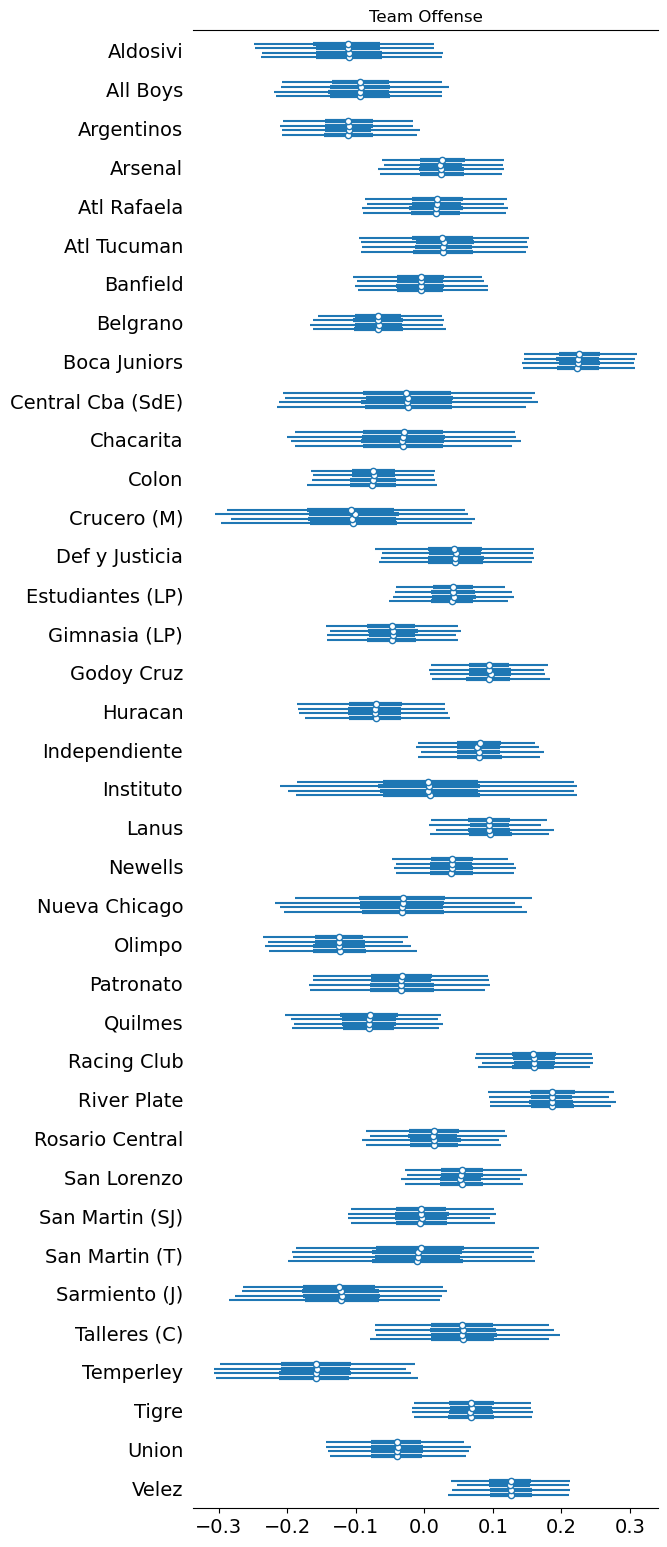

In [37]:
ax = az.plot_forest(trace, var_names=["atts"], labeller=TeamLabeller())
ax[0].set_title("Team Offense");

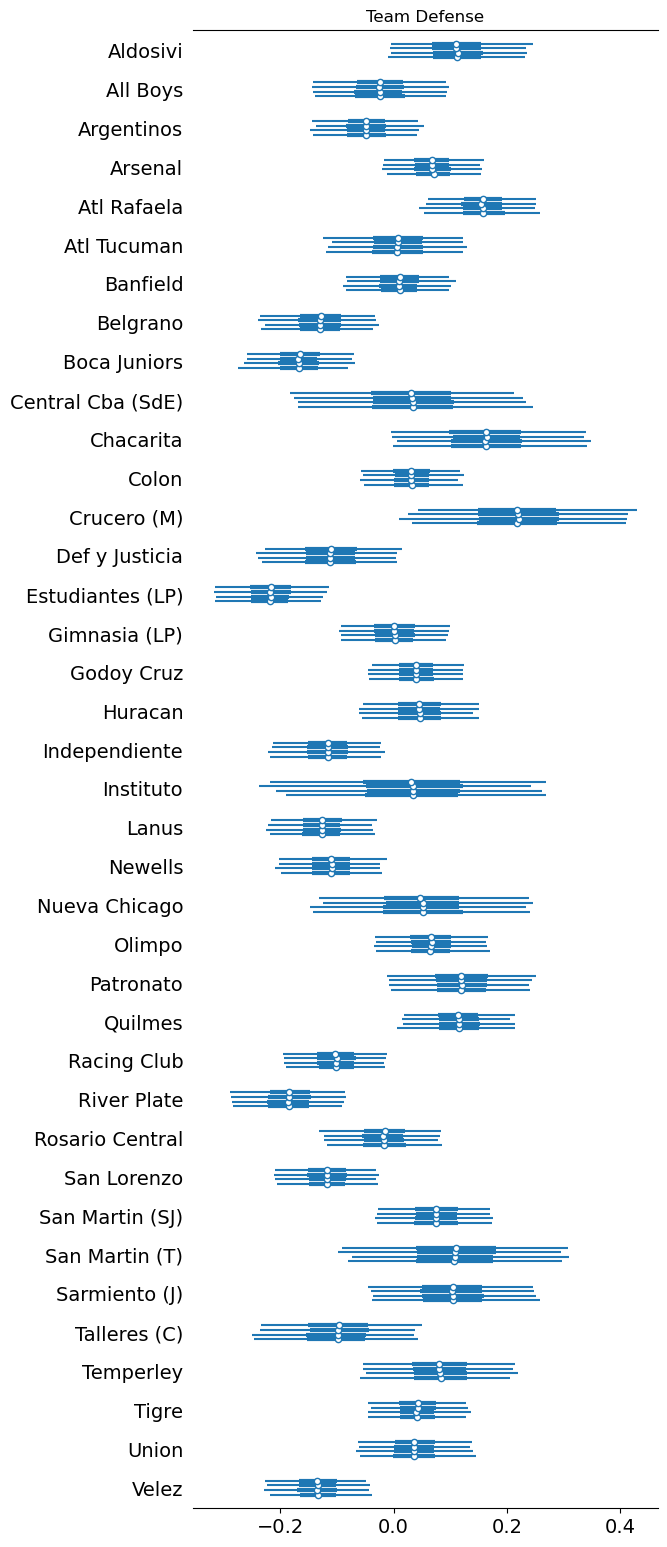

In [38]:
ax = az.plot_forest(trace, var_names=["defs"], labeller=TeamLabeller())
ax[0].set_title("Team Defense");

In [ ]:
#az.plot_posterior(trace, var_names=["defs"]);

Calculo probabilidad de quedar en un puesto dado

In [39]:
with model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)
    
pp = trace.posterior_predictive
const = trace.constant_data
team_da = trace.posterior.team

Sampling: [away_points, home_points]


Output()

In [40]:
pp

<xarray.Dataset> Size: 778MB
Dimensions:      (chain: 4, draw: 3000, match: 4053)
Coordinates:
  * chain        (chain) int64 32B 0 1 2 3
  * draw         (draw) int64 24kB 0 1 2 3 4 5 ... 2994 2995 2996 2997 2998 2999
  * match        (match) int64 32kB 0 1 2 3 4 5 ... 4048 4049 4050 4051 4052
Data variables:
    home_points  (chain, draw, match) int64 389MB 0 0 2 1 2 0 0 ... 0 2 3 0 1 0
    away_points  (chain, draw, match) int64 389MB 1 0 1 3 0 0 0 ... 2 2 1 1 1 2
Attributes:
    created_at:                 2025-06-06T16:46:51.090664+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.22.0

In [41]:
# fmt: off

''' Rugby
pp["home_win"] = (
    (pp["home_points"] > pp["away_points"]) * 3     # home team wins and gets 3 points
    + (pp["home_points"] == pp["away_points"]) * 2  # tie -> home team gets 2 points
)
pp["away_win"] = (
    (pp["home_points"] < pp["away_points"]) * 3
    + (pp["home_points"] == pp["away_points"]) * 2
)
# fmt: on

'''

pp["home_win"] = (
    (pp["home_points"] > pp["away_points"]) * 3     # home team wins and gets 3 points
    + (pp["home_points"] == pp["away_points"]) * 1  # tie -> home team gets 2 points
)
pp["away_win"] = (
    (pp["home_points"] < pp["away_points"]) * 3
    + (pp["home_points"] == pp["away_points"]) * 1
)

In [42]:
groupby_sum_home = pp.home_win.groupby(team_da[const.home_team]).sum()
groupby_sum_away = pp.away_win.groupby(team_da[const.away_team]).sum()

pp["teamscores"] = groupby_sum_home + groupby_sum_away

In [43]:
pp["teamscores"].sel(team="Tigre").values

array([[439, 404, 452, ..., 434, 441, 384],
       [426, 407, 395, ..., 433, 401, 398],
       [415, 378, 413, ..., 443, 449, 417],
       [448, 410, 413, ..., 421, 408, 427]], shape=(4, 3000))

In [44]:
from xarray_einstats.stats import rankdata

pp["rank"] = rankdata(-pp["teamscores"], dims="team", method="min")
pp[["rank"]].sel(team="Tigre")

<xarray.Dataset> Size: 120kB
Dimensions:  (chain: 4, draw: 3000)
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 24kB 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
    team     <U5 20B 'Tigre'
Data variables:
    rank     (chain, draw) int64 96kB 11 11 10 11 11 11 11 ... 9 10 11 12 13 11
Attributes:
    created_at:                 2025-06-06T16:46:51.090664+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.22.0

In [45]:
tt = pp["rank"].sel(team="Tigre")

(array([1.09375000e-03, 5.83333333e-03, 1.03645833e-02, 7.80729167e-02,
        1.14166667e-01, 3.16406250e-01, 8.50000000e-02, 9.21875000e-03,
        4.79166667e-03, 5.20833333e-05]),
 array([ 3. ,  4.6,  6.2,  7.8,  9.4, 11. , 12.6, 14.2, 15.8, 17.4, 19. ]),
 <BarContainer object of 10 artists>)

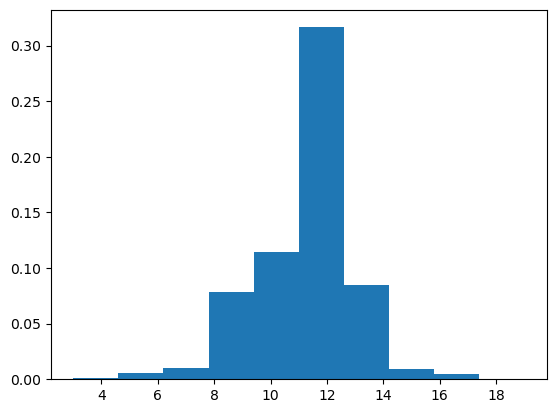

In [46]:
plt.hist(tt.values.flatten(), bins=10, density=True)

38

In [55]:
from xhistogram.xarray import histogram

bin_edges = np.arange(len(pp.team)) + 0.5
data_sim = (
    histogram(pp["rank"], dim=("chain", "draw"), bins=bin_edges, density=True)
    #.rename({"bin": "rank"})
    #.assign_coords(rank=np.arange(6) + 1)
)

c:\Users\verde\miniconda3\envs\pymc\Lib\site-packages\xhistogram\core.py:462: RuntimeWarning:

invalid value encountered in divide



In [56]:
idx_dim, col_dim = data_sim.dims
sim_table = pd.DataFrame(data_sim, index=data_sim[idx_dim], columns=data_sim[col_dim])

In [57]:
from matplotlib.ticker import StrMethodFormatter

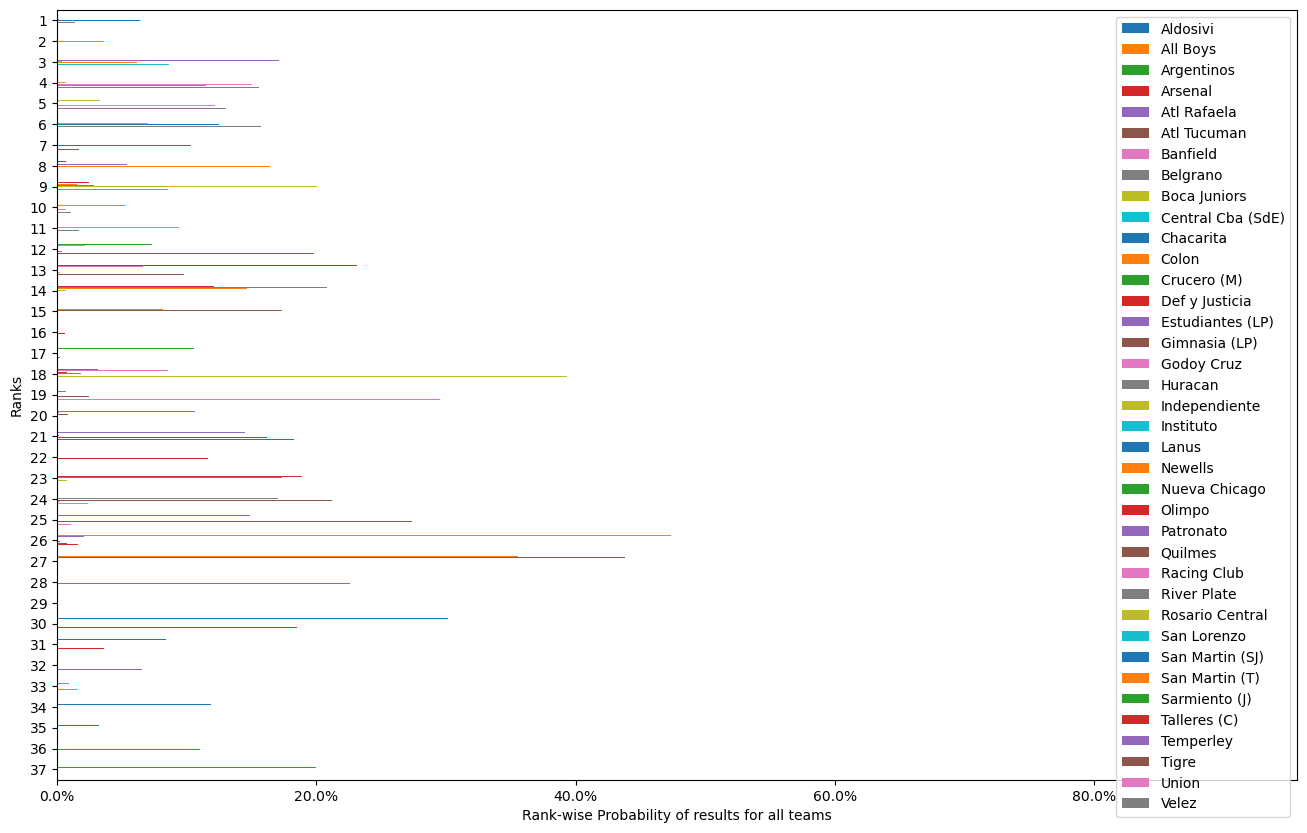

In [58]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sim_table.T.plot(kind="barh", ax=ax)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.1%}"))
ax.set_xlabel("Rank-wise Probability of results for all teams")
ax.set_yticklabels(np.arange(1, pp.team.shape[0]))
ax.set_ylabel("Ranks")
ax.invert_yaxis()
ax.legend(loc="best", fontsize="medium");

trato de predecir el resultado de un partido

In [72]:
with model:
    pp_ = pm.sample_posterior_predictive(trace)

Sampling: [away_points, home_points]


Output()

In [179]:
teams, home_idx

(Index(['Aldosivi', 'All Boys', 'Argentinos', 'Arsenal', 'Atl Rafaela',
        'Atl Tucuman', 'Banfield', 'Belgrano', 'Boca Juniors',
        'Central Cba (SdE)', 'Chacarita', 'Colon', 'Crucero (M)',
        'Def y Justicia', 'Estudiantes (LP)', 'Gimnasia (LP)', 'Godoy Cruz',
        'Huracan', 'Independiente', 'Instituto', 'Lanus', 'Newells',
        'Nueva Chicago', 'Olimpo', 'Patronato', 'Quilmes', 'Racing Club',
        'River Plate', 'Rosario Central', 'San Lorenzo', 'San Martin (SJ)',
        'San Martin (T)', 'Sarmiento (J)', 'Talleres (C)', 'Temperley', 'Tigre',
        'Union', 'Velez'],
       dtype='object'),
 array([ 2,  3,  1, ..., 33, 33, 36], shape=(4053,)))

In [168]:
team_dics = dict(zip(list(teams), home_idx.astype(int)))

In [169]:
team_dics

{'Aldosivi': np.int64(2),
 'All Boys': np.int64(3),
 'Argentinos': np.int64(1),
 'Arsenal': np.int64(1),
 'Atl Rafaela': np.int64(11),
 'Atl Tucuman': np.int64(1),
 'Banfield': np.int64(15),
 'Belgrano': np.int64(1),
 'Boca Juniors': np.int64(17),
 'Central Cba (SdE)': np.int64(1),
 'Chacarita': np.int64(20),
 'Colon': np.int64(1),
 'Crucero (M)': np.int64(1),
 'Def y Justicia': np.int64(25),
 'Estudiantes (LP)': np.int64(26),
 'Gimnasia (LP)': np.int64(1),
 'Godoy Cruz': np.int64(28),
 'Huracan': np.int64(1),
 'Independiente': np.int64(29),
 'Instituto': np.int64(1),
 'Lanus': np.int64(1),
 'Newells': np.int64(3),
 'Nueva Chicago': np.int64(3),
 'Olimpo': np.int64(5),
 'Patronato': np.int64(2),
 'Quilmes': np.int64(6),
 'Racing Club': np.int64(8),
 'River Plate': np.int64(2),
 'Rosario Central': np.int64(2),
 'San Lorenzo': np.int64(2),
 'San Martin (SJ)': np.int64(2),
 'San Martin (T)': np.int64(14),
 'Sarmiento (J)': np.int64(14),
 'Talleres (C)': np.int64(15),
 'Temperley': np.int6

In [147]:
teams[22]

'Nueva Chicago'

In [170]:
local_ = pp_.constant_data.home_team == team_dics["Tigre"]
away_ = pp_.constant_data.away_team == team_dics["Boca Juniors"]

In [171]:
combinada = (local_ & away_) #.sum()

cantidad de partidos que jugaron

In [172]:
combinada.sum()

<xarray.DataArray ()> Size: 8B
array(2)

In [173]:
golesLocal = pp_.posterior_predictive.home_points.sel(
    {"match": combinada}
).stack(desired=['chain', 'draw'])

In [174]:
golesVisita = pp_.posterior_predictive.away_points.sel(
    {"match": combinada}
).stack(desired=['chain', 'draw'])

In [175]:
golesLocal.values[0,:10], golesVisita.values[0,:10]

(array([2, 1, 2, 0, 1, 0, 0, 3, 1, 4]), array([1, 1, 0, 0, 0, 1, 2, 1, 2, 1]))

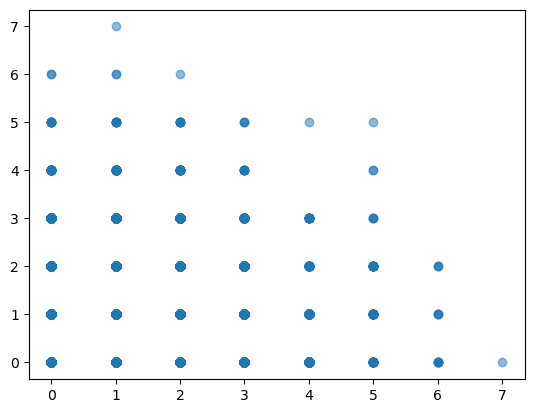

In [176]:
plt.plot(golesLocal.values[0,:], golesVisita.values[0,:], 'o', alpha=0.5)

(array([2.50020835e-04, 1.00008334e-03, 3.41695141e-03, 1.78348196e-02,
        6.78389866e-02, 1.77598133e-01, 3.01525127e-01, 2.39019918e-01,
        1.25177098e-01, 4.85873823e-02, 1.36678057e-02, 4.08367364e-03]),
 array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <BarContainer object of 12 artists>)

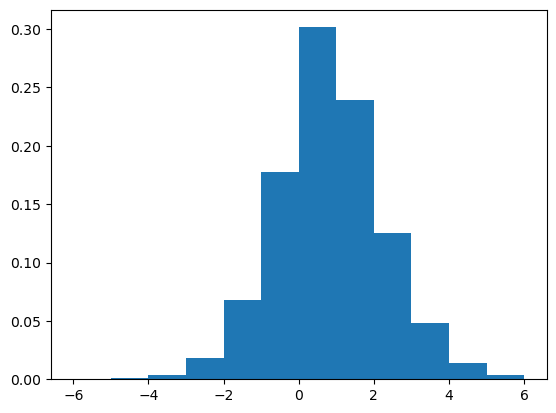

In [177]:
plt.hist(golesLocal[0,:].values - golesVisita[0,:].values, bins=np.arange(-6, 7, 1), density=True)

In [183]:
p_empate = (golesLocal[0,:].values == golesVisita[0,:].values).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de empate: {p_empate:.2%}")
p_ganaLocal = (golesLocal[0,:].values > golesVisita[0,:].values).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de que gane el local: {p_ganaLocal:.2%}")
p_ganaVisita = (golesLocal[0,:].values < golesVisita[0,:].values).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de que gane el visitante: {p_ganaVisita:.2%}")
p_empate_sg = ((golesLocal[0,:].values == 0) & (golesVisita[0,:].values == 0)).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de empate sin goles: {p_empate_sg:.2%}")
p_empate_33 = ((golesLocal[0,:].values == 3) & (golesVisita[0,:].values == 3)).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de empate sin goles: {p_empate_33:.2%}")
p_empate_50 = ((golesLocal[0,:].values == 5) & (golesVisita[0,:].values == 0)).sum() / len(golesLocal[0,:].values)
print(f"Probabilidad de empate sin goles: {p_empate_50:.2%}")

Probabilidad de empate: 30.15%
Probabilidad de que gane el local: 43.06%
Probabilidad de que gane el visitante: 26.79%
Probabilidad de empate sin goles: 12.65%
Probabilidad de empate sin goles: 0.55%
Probabilidad de empate sin goles: 0.32%
